<a href="https://colab.research.google.com/github/viswanathareddy04/MachineLearning/blob/main/disease_prediction_project_03_17_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,precision_score,roc_curve,recall_score,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_excel('disease_and_symptoms2_good.xlsx', header=None)

# row_counts = df1.count(axis=1)

# print(max(row_counts))

df1.columns = ['code', 'Disease', 'Symptom_1', 'Severity_1', 'Symptom_2', 'Severity_2',
              'Symptom_3', 'Severity_3', 'Symptom_4', 'Severity_4', 'Symptom_5', 'Severity_5',
              'Symptom_6', 'Severity_6', 'Symptom_7', 'Severity_7', 'Symptom_8', 'Severity_8',
              'Symptom_9', 'Severity_9', 'Symptom_10', 'Severity_10', 'Symptom_11', 'Severity_11', 'Symptom_12', 'Severity_12',
             ]

df1.head()

,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,"[{symptoms"":""Shortness of breath""}""","{symptoms"":""52""}""","{symptoms"":""Weakness""}""","{symptoms"":""49""}""","{symptoms"":""Nausea""}""","{symptoms"":""45""}""","{symptoms"":""Vomiting""}""","{symptoms"":""40""}""",...,"{symptoms"":""Sharp abdominal pain""}""","{symptoms"":""24""}""","{symptoms"":""Feeling ill""}""","{symptoms"":""15""}""","{symptoms"":""Decreased heart rate""}""","{symptoms"":""12""}""","{symptoms"":""Decreased appetite""}""","{symptoms"":""12""}""","{symptoms"":""Difficulty in swallowing""}""","{symptoms"":""8""}]"""
1,203,Cornea infection,"[{symptoms"":""Pain in eye""}""","{symptoms"":""80""}""","{symptoms"":""Eye redness""}""","{symptoms"":""66""}""","{symptoms"":""Diminished vision""}""","{symptoms"":""55""}""","{symptoms"":""Symptoms of eye""}""","{symptoms"":""44""}""",...,"{symptoms"":""Itchiness of eye""}""","{symptoms"":""21""}""","{symptoms"":""Spots or clouds in vision""}""","{symptoms"":""13""}""","{symptoms"":""Swollen eye""}""","{symptoms"":""10""}""","{symptoms"":""Lip swelling""}""","{symptoms"":""7""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""7""}]"""
2,204,Abscess of the lung,"[{symptoms"":""Cough""}""","{symptoms"":""81""}""","{symptoms"":""Sharp chest pain""}""","{symptoms"":""72""}""","{symptoms"":""Shortness of breath""}""","{symptoms"":""72""}""","{symptoms"":""Hemoptysis""}""","{symptoms"":""54""}""",...,"{symptoms"":""Vomiting""}""","{symptoms"":""54""}""","{symptoms"":""Headache""}""","{symptoms"":""54""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""5""}""","{symptoms"":""Wrist weakness""}""","{symptoms"":""5""}""","{symptoms"":""Excessive growth""}""","{symptoms"":""5""}]"""
3,205,Dengue fever,"[{symptoms"":""Sore throat""}""","{symptoms"":""100""}""","{symptoms"":""Fever""}""","{symptoms"":""100""}""","{symptoms"":""Shoulder cramps or spasms""}""","{symptoms"":""32""}""","{symptoms"":""Ankle pain""}""","{symptoms"":""32""}""",...,"{symptoms"":""Excessive anger""}""","{symptoms"":""32""}""","{symptoms"":""Pain or soreness of breast""}""","{symptoms"":""32""}""","{symptoms"":""Knee lump or mass""}""","{symptoms"":""32""}""","{symptoms"":""Facial pain""}""","{symptoms"":""32""}""","{symptoms"":""Pain in eye""}""","{symptoms"":""32""}]"""
4,206,Chronic sinusitis,"[{symptoms"":""Cough""}""","{symptoms"":""75""}""","{symptoms"":""Nasal congestion""}""","{symptoms"":""75""}""","{symptoms"":""Headache""}""","{symptoms"":""62""}""","{symptoms"":""Sore throat""}""","{symptoms"":""59""}""",...,"{symptoms"":""Ear pain""}""","{symptoms"":""39""}""","{symptoms"":""Painful sinuses""}""","{symptoms"":""34""}""","{symptoms"":""Sinus congestion""}""","{symptoms"":""27""}""","{symptoms"":""Facial pain""}""","{symptoms"":""23""}""","{symptoms"":""Congestion in chest""}""","{symptoms"":""14""}]"""


In [ ]:

df1.dropna(axis=1,how='all',inplace=True)
df1.head()

,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,"[{symptoms"":""Shortness of breath""}""","{symptoms"":""52""}""","{symptoms"":""Weakness""}""","{symptoms"":""49""}""","{symptoms"":""Nausea""}""","{symptoms"":""45""}""","{symptoms"":""Vomiting""}""","{symptoms"":""40""}""",...,"{symptoms"":""Sharp abdominal pain""}""","{symptoms"":""24""}""","{symptoms"":""Feeling ill""}""","{symptoms"":""15""}""","{symptoms"":""Decreased heart rate""}""","{symptoms"":""12""}""","{symptoms"":""Decreased appetite""}""","{symptoms"":""12""}""","{symptoms"":""Difficulty in swallowing""}""","{symptoms"":""8""}]"""
1,203,Cornea infection,"[{symptoms"":""Pain in eye""}""","{symptoms"":""80""}""","{symptoms"":""Eye redness""}""","{symptoms"":""66""}""","{symptoms"":""Diminished vision""}""","{symptoms"":""55""}""","{symptoms"":""Symptoms of eye""}""","{symptoms"":""44""}""",...,"{symptoms"":""Itchiness of eye""}""","{symptoms"":""21""}""","{symptoms"":""Spots or clouds in vision""}""","{symptoms"":""13""}""","{symptoms"":""Swollen eye""}""","{symptoms"":""10""}""","{symptoms"":""Lip swelling""}""","{symptoms"":""7""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""7""}]"""
2,204,Abscess of the lung,"[{symptoms"":""Cough""}""","{symptoms"":""81""}""","{symptoms"":""Sharp chest pain""}""","{symptoms"":""72""}""","{symptoms"":""Shortness of breath""}""","{symptoms"":""72""}""","{symptoms"":""Hemoptysis""}""","{symptoms"":""54""}""",...,"{symptoms"":""Vomiting""}""","{symptoms"":""54""}""","{symptoms"":""Headache""}""","{symptoms"":""54""}""","{symptoms"":""Itchy eyelid""}""","{symptoms"":""5""}""","{symptoms"":""Wrist weakness""}""","{symptoms"":""5""}""","{symptoms"":""Excessive growth""}""","{symptoms"":""5""}]"""
3,205,Dengue fever,"[{symptoms"":""Sore throat""}""","{symptoms"":""100""}""","{symptoms"":""Fever""}""","{symptoms"":""100""}""","{symptoms"":""Shoulder cramps or spasms""}""","{symptoms"":""32""}""","{symptoms"":""Ankle pain""}""","{symptoms"":""32""}""",...,"{symptoms"":""Excessive anger""}""","{symptoms"":""32""}""","{symptoms"":""Pain or soreness of breast""}""","{symptoms"":""32""}""","{symptoms"":""Knee lump or mass""}""","{symptoms"":""32""}""","{symptoms"":""Facial pain""}""","{symptoms"":""32""}""","{symptoms"":""Pain in eye""}""","{symptoms"":""32""}]"""
4,206,Chronic sinusitis,"[{symptoms"":""Cough""}""","{symptoms"":""75""}""","{symptoms"":""Nasal congestion""}""","{symptoms"":""75""}""","{symptoms"":""Headache""}""","{symptoms"":""62""}""","{symptoms"":""Sore throat""}""","{symptoms"":""59""}""",...,"{symptoms"":""Ear pain""}""","{symptoms"":""39""}""","{symptoms"":""Painful sinuses""}""","{symptoms"":""34""}""","{symptoms"":""Sinus congestion""}""","{symptoms"":""27""}""","{symptoms"":""Facial pain""}""","{symptoms"":""23""}""","{symptoms"":""Congestion in chest""}""","{symptoms"":""14""}]"""


In [ ]:

df1 = df1.fillna('')

for col in df1.columns[2:]:
    df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')
 
df1.head()

<ipython-input-4-d8df7524950f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')
<ipython-input-4-d8df7524950f>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[col] = df1[col].str.replace('[{}]','').str.replace('"','').str.replace('[','').str.replace(']','').str.replace('symptoms:','')


,code,Disease,Symptom_1,Severity_1,Symptom_2,Severity_2,Symptom_3,Severity_3,Symptom_4,Severity_4,...,Symptom_8,Severity_8,Symptom_9,Severity_9,Symptom_10,Severity_10,Symptom_11,Severity_11,Symptom_12,Severity_12
0,202,Hyperkalemia,Shortness of breath,52,Weakness,49,Nausea,45,Vomiting,40,...,Sharp abdominal pain,24,Feeling ill,15,Decreased heart rate,12,Decreased appetite,12,Difficulty in swallowing,8
1,203,Cornea infection,Pain in eye,80,Eye redness,66,Diminished vision,55,Symptoms of eye,44,...,Itchiness of eye,21,Spots or clouds in vision,13,Swollen eye,10,Lip swelling,7,Itchy eyelid,7
2,204,Abscess of the lung,Cough,81,Sharp chest pain,72,Shortness of breath,72,Hemoptysis,54,...,Vomiting,54,Headache,54,Itchy eyelid,5,Wrist weakness,5,Excessive growth,5
3,205,Dengue fever,Sore throat,100,Fever,100,Shoulder cramps or spasms,32,Ankle pain,32,...,Excessive anger,32,Pain or soreness of breast,32,Knee lump or mass,32,Facial pain,32,Pain in eye,32
4,206,Chronic sinusitis,Cough,75,Nasal congestion,75,Headache,62,Sore throat,59,...,Ear pain,39,Painful sinuses,34,Sinus congestion,27,Facial pain,23,Congestion in chest,14


In [ ]:
def create_symptom_dict(row):
    symptom_dict = {}
    for i in range(1, 13):
        symptom_col = f"Symptom_{i}"
        severity_col = f"Severity_{i}"
        if pd.isna(row[symptom_col]) or pd.isna(row[severity_col]):
            break
        weightage = pd.to_numeric(row[severity_col])
        if weightage >= 30:
          symptom_dict[row[symptom_col]] = weightage
    return symptom_dict
symptom_dict = {}
for index, row in df1.iterrows():
    symptom_dict[row['Disease']] = create_symptom_dict(row)

#symptom_dict

In [ ]:
import random

# Create a new dictionary with swapped symptom-severity pairs
new_disease_symptoms = {}
for disease, symptoms in symptom_dict.items():
    new_symptoms = {}
    for symptom, severity in symptoms.items():
        new_symptoms[severity] = symptom
    new_disease_symptoms[disease] = new_symptoms

# Generate duplicate data by randomly swapping symptom-severity pairs for each disease
duplicates = []
for disease, symptoms in symptom_dict.items():
    new_symptoms = new_disease_symptoms[disease]
    for i in range(5):  # Generate 10 duplicate examples for each disease
        new_symptom_severity = {}
        for severity, symptom in new_symptoms.items():
            new_symptom_severity[symptom] = severity
        duplicates.append({disease: new_symptom_severity})

#duplicates 


In [ ]:
import random

# Function to swap symptom positions within a disease dictionary
def swap_symptom_positions(disease_list):
    new_disease_list = []
    for disease_dict in disease_list:
        disease, symptoms = list(disease_dict.items())[0]
        new_symptoms = {}
        symptom_keys = list(symptoms.keys())
        random.shuffle(symptom_keys)
        for key in symptom_keys:
            new_symptoms[key] = symptoms[key]
        new_disease_dict = {disease: new_symptoms}
        new_disease_list.append(new_disease_dict)
    return new_disease_list


# Example usage
print("Original disease dict:")
print(duplicates)
print()

new_disease_dict = swap_symptom_positions(duplicates)
print("New disease dict with swapped symptom positions:")
#new_disease_dict


Original disease dict:
[{'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Hyperkalemia': {'Shortness of breath': 52, 'Weakness': 49, 'Nausea': 45, 'Vomiting': 40, 'Dizziness': 36, 'Sharp chest pain': 32}}, {'Cornea infection': {'Pain in eye': 80, 'Eye redness': 66, 'Diminished vision': 55, 'Symptoms of eye': 44, 'Foreign body sensation in eye': 39, 'Lacrimation': 32}}, {'Cornea infection': {'Pain in eye': 80, 'Eye redness': 66, 'Diminished vision': 55, 'Symptoms of eye': 44, 'Foreign body sensation in eye':

In [ ]:
df3 = pd.DataFrame()

In [ ]:
for d in new_disease_dict:
  for disease, symptoms in d.items():
      row_data = {'disease': disease}
      row_data.update(symptoms)
      df3 = df3.append(row_data, ignore_index=True)

In [ ]:
df3

,disease,Sharp chest pain,Shortness of breath,Weakness,Vomiting,Dizziness,Nausea,Diminished vision,Eye redness,Foreign body sensation in eye,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
0,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,Intracranial hemorrhage,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3976,Intracranial hemorrhage,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3977,Intracranial hemorrhage,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3978,Intracranial hemorrhage,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3.shape

(3980, 244)

In [ ]:
df3.fillna(0, inplace=True)

df3.head()

,disease,Sharp chest pain,Shortness of breath,Weakness,Vomiting,Dizziness,Nausea,Diminished vision,Eye redness,Foreign body sensation in eye,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
0,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hyperkalemia,32.0,52.0,49.0,40.0,36.0,45.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3.to_csv("cleaned_disease_symptoms.csv", sep=',', encoding='utf-8', index=False)


In [5]:
df3 = pd.read_csv('cleaned_disease_symptoms.csv')
df3.head()

,disease,Dizziness,Vomiting,Nausea,Shortness of breath,Sharp chest pain,Weakness,Diminished vision,Eye redness,Foreign body sensation in eye,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
0,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Hyperkalemia,36.0,40.0,45.0,52.0,32.0,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df3.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Columns: 244 entries, disease to Too little hair
dtypes: float64(243), object(1)
memory usage: 7.4+ MB


In [8]:
df3.describe()

,Dizziness,Vomiting,Nausea,Shortness of breath,Sharp chest pain,Weakness,Diminished vision,Eye redness,Foreign body sensation in eye,Lacrimation,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,...,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,2.944724,4.814070,3.744975,4.713568,4.447236,1.846734,3.125628,1.670854,0.238693,0.660804,...,0.084171,0.056533,0.043970,0.050251,0.060302,0.115578,0.047739,0.047739,0.046482,0.118090
std,12.419814,15.649003,13.771792,15.898439,15.266370,9.277039,14.014024,10.478725,3.616556,5.833668,...,2.373558,1.594181,1.239918,1.417050,1.700460,2.380432,1.346197,1.346197,1.310771,3.330067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,96.000000,85.000000,85.000000,94.000000,68.000000,83.000000,91.000000,80.000000,72.000000,...,67.000000,45.000000,35.000000,40.000000,48.000000,58.000000,38.000000,38.000000,37.000000,94.000000


In [26]:
corr_matrix = df3.corr()
corr_matrix

,Dizziness,Vomiting,Nausea,Shortness of breath,Sharp chest pain,Weakness,Diminished vision,Eye redness,Foreign body sensation in eye,Lacrimation,...,Skin on arm or hand looks infected,Vaginal dryness,Cross-eyed,Bowlegged or knock-kneed,Muscle pain,Temper problems,Cramps and spasms,Symptoms of infants,Sinus congestion,Too little hair
Dizziness,1.000000,0.110208,0.193039,0.070649,0.093385,0.256875,-0.052895,-0.037815,-0.015653,-0.026864,...,-0.008410,-0.008410,-0.008410,-0.008410,-0.008410,-0.011515,-0.008410,-0.008410,-0.008410,-0.008410
Vomiting,0.110208,1.000000,0.699397,0.002195,0.058075,0.150377,-0.068629,-0.049064,-0.020309,-0.034855,...,-0.010912,-0.010912,-0.010912,-0.010912,-0.010912,-0.014940,-0.010912,-0.010912,-0.010912,-0.010912
Nausea,0.193039,0.699397,1.000000,-0.056228,0.082401,0.179034,-0.060666,-0.043371,-0.017952,-0.030810,...,-0.009646,-0.009646,-0.009646,-0.009646,-0.009646,-0.013206,-0.009646,-0.009646,-0.009646,-0.009646
Shortness of breath,0.070649,0.002195,-0.056228,1.000000,0.537898,0.089195,-0.066142,-0.047286,-0.019573,-0.033592,...,-0.010516,-0.010516,-0.010516,-0.010516,-0.010516,-0.014399,-0.010516,-0.010516,-0.010516,-0.010516
Sharp chest pain,0.093385,0.058075,0.082401,0.537898,1.000000,0.055902,-0.064989,-0.046462,-0.019231,-0.033006,...,-0.010333,-0.010333,-0.010333,-0.010333,0.068665,-0.014148,-0.010333,-0.010333,-0.010333,-0.010333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Temper problems,-0.011515,-0.014940,-0.013206,-0.014399,-0.014148,-0.009668,-0.010832,-0.007744,-0.003205,-0.005501,...,-0.001722,-0.001722,-0.001722,-0.001722,-0.001722,1.000000,-0.001722,0.504912,-0.001722,-0.001722
Cramps and spasms,-0.008410,-0.010912,-0.009646,-0.010516,-0.010333,-0.007061,-0.007911,-0.005656,-0.002341,-0.004018,...,-0.001258,-0.001258,-0.001258,-0.001258,-0.001258,-0.001722,1.000000,-0.001258,-0.001258,-0.001258
Symptoms of infants,-0.008410,-0.010912,-0.009646,-0.010516,-0.010333,-0.007061,-0.007911,-0.005656,-0.002341,-0.004018,...,-0.001258,-0.001258,-0.001258,-0.001258,-0.001258,0.504912,-0.001258,1.000000,-0.001258,-0.001258
Sinus congestion,-0.008410,-0.010912,-0.009646,-0.010516,-0.010333,-0.007061,-0.007911,-0.005656,-0.002341,-0.004018,...,-0.001258,-0.001258,-0.001258,-0.001258,-0.001258,-0.001722,-0.001258,-0.001258,1.000000,-0.001258


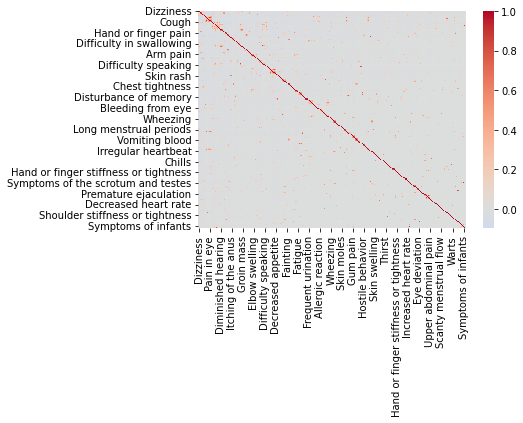

In [27]:
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.show()

In [9]:
df3.isnull().sum()

disease                0
Dizziness              0
Vomiting               0
Nausea                 0
Shortness of breath    0
                      ..
Temper problems        0
Cramps and spasms      0
Symptoms of infants    0
Sinus congestion       0
Too little hair        0
Length: 244, dtype: int64

<Axes: xlabel='Dizziness', ylabel='Count'>

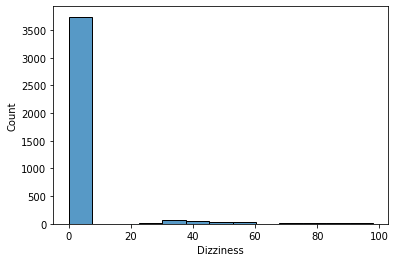

In [11]:
sns.histplot(df3["Dizziness"])

<Axes: xlabel='Nausea', ylabel='Density'>

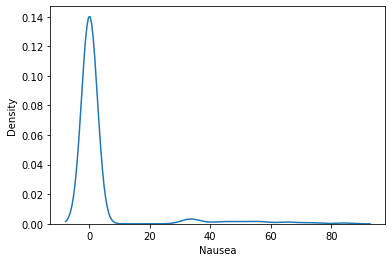

In [15]:
sns.kdeplot(df3["Nausea"])

In [62]:
X = df3.drop('disease', axis=1)
y = df3['disease']

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X.shape , y.shape , X_resampled.shape , y_resampled.shape

((3980, 243), (3980,), (3980, 243), (3980,))

In [63]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))

Training set size: 2547
Validation set size: 637
Testing set size: 796


In [64]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## Modelling

In [65]:
def print_evaluation_metrics(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision, recall, and f1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print the results
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

In [66]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred)




Accuracy: 0.842964824120603
Precision: 0.8312604690117253
Recall: 0.842964824120603
F1-score: 0.8342736409319323


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
y_pred_val = svc.predict(X_val_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print('Accuracy:', accuracy)

Accuracy: 0.8759811616954474


In [67]:
lr_cv = LogisticRegression(max_iter=10000)
lr_cv.fit(X_train_scaled, y_train)
y_pred_lr_cv = lr_cv.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_lr_cv)

Accuracy: 0.8077889447236181
Precision: 0.793730557549653
Recall: 0.8077889447236181
F1-score: 0.7975083752093803


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
y_pred_val = lr_cv.predict(X_val_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print('Accuracy:', accuracy)

Accuracy: 0.8351648351648352


In [68]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
y_pred_dtc = dtc.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_dtc)

Accuracy: 0.8894472361809045
Precision: 0.883500837520938
Recall: 0.8894472361809045
F1-score: 0.8854600382866715


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
y_pred_val = dtc.predict(X_val_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print('Accuracy:', accuracy)

Accuracy: 0.9089481946624803


In [69]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)
print_evaluation_metrics(y_test, y_pred_rfc)

Accuracy: 0.8894472361809045
Precision: 0.8833333333333333
Recall: 0.8894472361809045
F1-score: 0.8851459679349127


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
print( confusion_matrix(y_test, y_pred_rfc))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [77]:
y_pred_val = rfc.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred_val)
print('Accuracy:', accuracy)

Accuracy: 0.9089481946624803


cohen_kappa_score

In [117]:
from sklearn.metrics import cohen_kappa_score
kappa_original = cohen_kappa_score(y_test, y_pred_rfc)
kappa_original

0.889228005477875

In [81]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled, y_train)
y_pred_rfce = rf.predict(X_test_scaled)
score = rf.score(X_test_scaled, y_test)
# print_evaluation_metrics(y_test, y_pred_rfce)


In [83]:
y_pred_val = rf.predict(X_val_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)


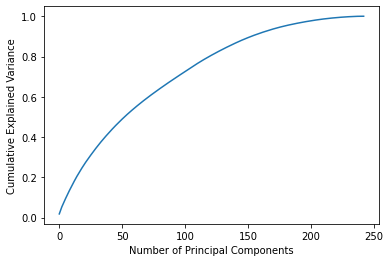

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
# Fit a PCA model to the data
pca = PCA()
pca.fit(X_train_scaled)

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# # Scale input features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_resampled)

# Perform PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Perform LDA
lda = LinearDiscriminantAnalysis()
X_train_lda  = lda.fit_transform(X_train_pca,y_train)
X_test_lda = lda.transform(X_test_pca)
print(X_train_lda.shape)
print(X_test_lda.shape)

(3184, 50)
(796, 50)


In [112]:
symptoms = [0.0,0.0,0.0,66.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

In [113]:
X = np.array(symptoms).reshape(1, -1)
scaled_test= scaler.transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [114]:
predicted_disease = rfc.predict(scaled_test)
predicted_disease

array(['Pericarditis'], dtype=object)